In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# This is just for creating your small hdf file by using neon_fwf.py file that I sent before.
import neon_fwf
path = '/home/shaig93/Documents/internship_FWF/f_asc.asc'
neon_fwf.create_hdf(path, 'mod.hdf')

In [3]:
h = h5py.File('mod.hdf', 'r') # Shaig
h2 = h5py.File('neon.hdf', 'r') # Dr. Rheinwalt

In [4]:
h.keys(), h2.keys()

(<KeysViewHDF5 ['Amplitude', 'Index', 'XYZ']>,
 <KeysViewHDF5 ['Amplitude', 'Index', 'XYZ']>)

In [5]:
index = h['Index']
amp = h['Amplitude']
elv = h['XYZ'][:, 2]

In [6]:
index2 = h2['Index'][:index.shape[0]+1]
amp2 = h2['Amplitude'][:amp.shape[0]]
elv2 = h2['XYZ'][:elv.shape[0], 2]

Z minimum (Outgoing (ASCII reader)) -  1357.15786  - Intensity min (Outgoing(ASCII reader)) -  200
Z maximum (Outgoing (ASCII reader)) -  1364.19  - Intensity max (Outgoing(ASCII reader)) -  511
Z min (Returning (ASCII reader)) -  358.4964300000006  - Intensity min (Returning(ASCII reader)) -  188
Z max (Returning (ASCII reader)) -  382.2155999999991  - Intensity max (Returning(ASCII reader)) -  358


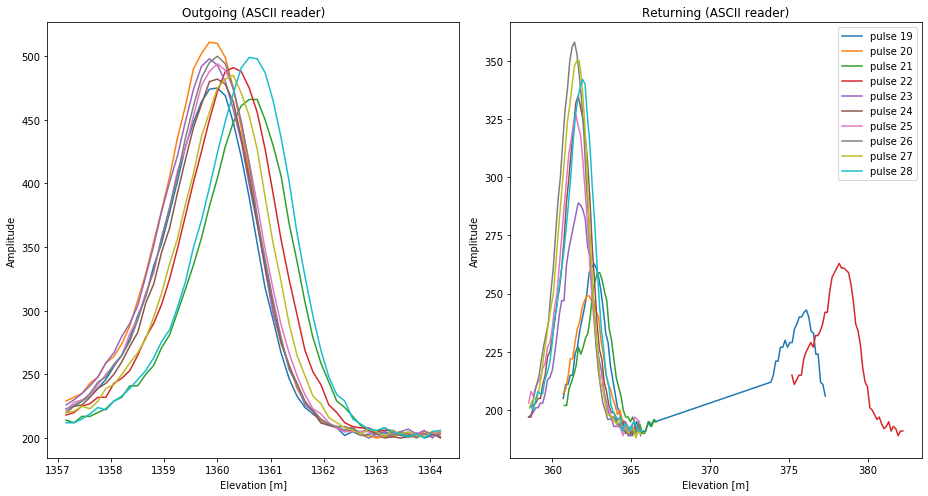

In [7]:
import h5py
from matplotlib import pyplot as pl

g = h
amp = g['Amplitude']
xyz = g['XYZ']
idx = g['Index']

fg, ax = pl.subplots(1, 2, figsize=(13, 7))
# ax = fg.add_subplot(111)
z_min = np.ones(1) * 9999
z_max = np.zeros(1)
amp_min = np.ones(1) * 9999
amp_max = np.zeros(1)
for i in range(19, 29):
    a = amp[idx[i]:idx[i+1], :]
    z = xyz[idx[i]:idx[i+1], 2]
    z = z[a[:,1] == 0]
    a = a[a[:,1] == 0, 0]
    if z.min() < z_min:
        z_min = z.min()
    if z_max < z.max():
        z_max = z.max()
    if a.min() < amp_min:
        amp_min = a.min()
    if amp_max < a.max():
        amp_max = a.max()
    ax[0].plot(z, a, label = 'pulse %i' % i)

ax[0].set_xlabel('Elevation [m]')
ax[0].set_ylabel('Amplitude')
print('Z minimum (Outgoing (ASCII reader)) - ', z_min, ' - Intensity min (Outgoing(ASCII reader)) - ', amp_min)
print('Z maximum (Outgoing (ASCII reader)) - ', z_max, ' - Intensity max (Outgoing(ASCII reader)) - ', amp_max)
ax[0].set_title('Outgoing (ASCII reader)')
z_min = np.ones(1) * 9999
z_max = np.zeros(1)
amp_min = np.ones(1) * 9999
amp_max = np.zeros(1)
for i in range(19, 29):
    a = amp[idx[i]:idx[i+1], :]
    z = xyz[idx[i]:idx[i+1], 2]
    z = z[a[:,1] > 0]
    a = a[a[:,1] > 0, 0]
    if z.min() < z_min:
        z_min = z.min()
    if z_max < z.max():
        z_max = z.max()
    if a.min() < amp_min:
        amp_min = a.min()
    if amp_max < a.max():
        amp_max = a.max()
    ax[1].plot(z, a, label = 'pulse %i' % i)
ax[1].set_xlabel('Elevation [m]')
ax[1].set_ylabel('Amplitude')
print('Z min (Returning (ASCII reader)) - ', z_min, ' - Intensity min (Returning(ASCII reader)) - ', amp_min)
print('Z max (Returning (ASCII reader)) - ', z_max, ' - Intensity max (Returning(ASCII reader)) - ', amp_max)
ax[1].set_title('Returning (ASCII reader)')
pl.legend()
pl.tight_layout()
pl.show()

Z minimum (Outgoing (Binary Reader)) -  1357.15786  - Intensity min (Binary(ASCII reader)) -  200
Z maximum (Outgoing (Binary Reader)) -  1364.19  - Intensity max (Binary(ASCII reader)) -  511
Z minimum (Returning (Binary Reader)) -  358.4964300000006  - Intensity min (Returning(Binary reader)) -  188
Z maximum (Returning (Binary Reader)) -  382.2155999999991  - Intensity max (Returning(Binary reader)) -  358


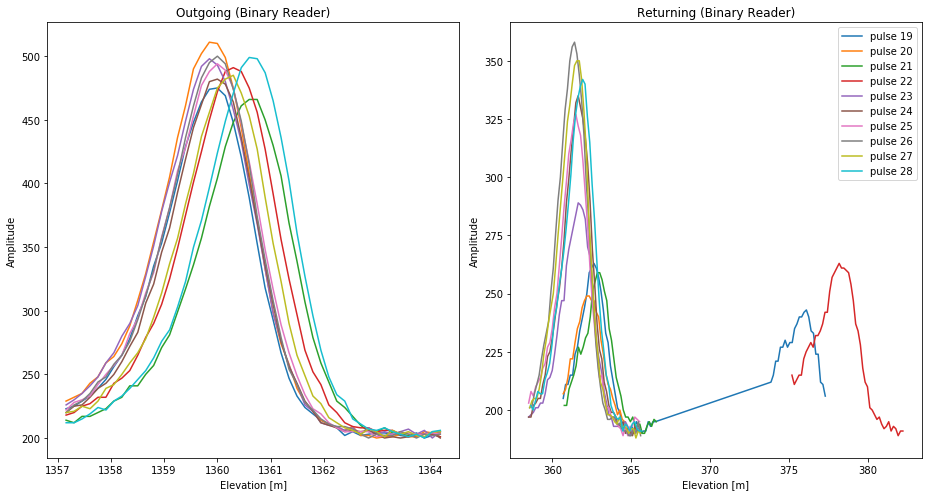

In [8]:
import h5py
from matplotlib import pyplot as pl

g = h2
amp = g['Amplitude']
xyz = g['XYZ']
idx = g['Index']

fg, ax = pl.subplots(1, 2, figsize=(13, 7))
# ax = fg.add_subplot(111)
z_min = np.ones(1) * 9999
z_max = np.zeros(1)
amp_min = np.ones(1) * 9999
amp_max = np.zeros(1)
for i in range(19, 29):
    a = amp[idx[i]:idx[i+1], :]
    z = xyz[idx[i]:idx[i+1], 2]
    z = z[a[:,1] == 0]
    a = a[a[:,1] == 0, 0]
    if z.min() < z_min:
        z_min = z.min()
    if z_max < z.max():
        z_max = z.max()
    if a.min() < amp_min:
        amp_min = a.min()
    if amp_max < a.max():
        amp_max = a.max()
    ax[0].plot(z, a, label = 'pulse %i' % i)

ax[0].set_xlabel('Elevation [m]')
ax[0].set_ylabel('Amplitude')
print('Z minimum (Outgoing (Binary Reader)) - ', z_min, ' - Intensity min (Binary(ASCII reader)) - ', amp_min)
print('Z maximum (Outgoing (Binary Reader)) - ', z_max, ' - Intensity max (Binary(ASCII reader)) - ', amp_max)
ax[0].set_title('Outgoing (Binary Reader)')
z_min = np.ones(1) * 9999
z_max = np.zeros(1)
amp_min = np.ones(1) * 9999
amp_max = np.zeros(1)
for i in range(19, 29): # Dr. Rheinwalt starts indexing with 0 that's why it is (701, 711) instead of (700, 710)
    a = amp[idx[i]:idx[i+1], :]
    z = xyz[idx[i]:idx[i+1], 2]
    z = z[a[:,1] > 0]
    a = a[a[:,1] > 0, 0]
    if z.min() < z_min:
        z_min = z.min()
    if z_max < z.max():
        z_max = z.max()
    if a.min() < amp_min:
        amp_min = a.min()
    if amp_max < a.max():
        amp_max = a.max()
    ax[1].plot(z, a, label = 'pulse %i' % i)

ax[1].set_xlabel('Elevation [m]')
ax[1].set_ylabel('Amplitude')
print('Z minimum (Returning (Binary Reader)) - ', z_min, ' - Intensity min (Returning(Binary reader)) - ', amp_min)
print('Z maximum (Returning (Binary Reader)) - ', z_max, ' - Intensity max (Returning(Binary reader)) - ', amp_max)
ax[1].set_title('Returning (Binary Reader)')
pl.legend()
pl.tight_layout()
pl.show()

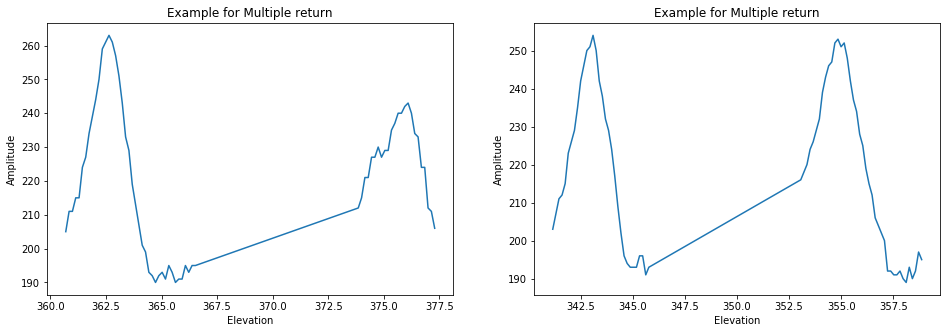

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax[0].plot(elv2[index2[19]:index2[20]][amp2[index2[19]:index2[20]][:, 1] != 0], 
         amp2[index2[19]:index2[20]][amp2[index2[19]:index2[20]][:, 1] != 0][:, 0])
ax[1].plot(elv2[index2[129]:index2[130]][amp2[index2[129]:index2[130]][:, 1] != 0], 
         amp2[index2[129]:index2[130]][amp2[index2[129]:index2[130]][:, 1] != 0][:, 0])
for i in range(2):
    ax[i].set_title('Example for Multiple return')
    ax[i].set_xlabel('Elevation')
    ax[i].set_ylabel('Amplitude')

In [ ]:
import sys
import numpy as np
from lmfit import Model, Parameters
from lmfit.models import ExponentialGaussianModel
from h5py import File
from matplotlib import pyplot as pl

thr = 10

def noise(x, offset):
    return offset * np.ones(x.shape)

def outgoing(t, a):
    model = ExponentialGaussianModel() + Model(noise)
    model.set_param_hint('amplitude', value = 10*a.max(), min = 0, max = 1000*a.max())
    model.set_param_hint('center', value = t[np.argmax(a)], min = max(0, t.min()-5), max = t.max())
    model.set_param_hint('sigma', value = 5, min = 0, max = 10)
    model.set_param_hint('gamma', value = 0.25, min = 0, max = 10)
    model.set_param_hint('offset', value = 0, min = -5, max = 20)
    param = model.make_params() 
    reslt = model.fit(a, param, x = t, nan_policy = 'propagate')
    rvals = reslt.params.valuesdict()
    return (rvals, reslt.residual)

def wrap(data):
    # input
    ij, aseg, crds = data

    mseg = aseg[:, 1]
    aseg = aseg[:, 0].astype('float')
    a = aseg[mseg == 0]
    a -= a[:3].mean()
    t = np.arange(len(a))
    t = t[a > thr]
    a = a[a > thr]
    rvals, err = outgoing(t, a)
    return (rvals, t, a, err)

In [ ]:
bbw = 250.0
# lower left corner of bounding box
xmin, ymin = 251352.60096999988, 4110294.4876000006

load = True
if load:
    fname = 'mod.hdf' #sys.argv[1]
    f = File(fname, 'r')
    k = f['Index'][:]#[:1000000][:]
    kk = k[1:] - 1
    fxyz = f['XYZ'][:]
    famp = f['Amplitude'][:]

    # x-y-coords of each pulse last sample
    xy = fxyz[kk, :2]
    ix = (xy[:,0] - xmin) / bbw
    iy = (xy[:,1] - ymin) / bbw
    ix[ix < 0] = -1
    iy[iy < 0] = -1
    ix = ix.astype('int')
    iy = iy.astype('int')
    ij = np.where((ix == 0) * (iy == 0))[0]

    # we have m pulses in the bounding box
    m = len(ij)

    # let's just take 5k
    m = 1500

    data = []
    for i in range(m):
        data.append((ij[i], famp[k[ij[i]]:k[ij[i]+1]], fxyz[k[ij[i]]:k[ij[i]+1]]))


In [ ]:
blft = -2.5
brht = 6
fact = 4
# number of bins = (brht-blft) * fact
nbin = int((brht-blft) * fact)
bedg = np.linspace(blft, brht, nbin + 1)
bwid = bedg[1] - bedg[0]
bcen = (bedg[1:] + bedg[:-1]) / 2
bins = [[] for i in range(nbin)]

In [ ]:
fg, ax = pl.subplots(1, 1, figsize = (9.6, 5.4))
pl.suptitle('Exponential Gaussian Model (5000 pulses)')
for i, dat in enumerate(data):
    # lsq fitting
    rout = wrap(dat)

    # align all residuals by fit parameters
    t = rout[1].astype('float')
    t -= rout[0]['center']
    t /= rout[0]['sigma']

    # plot all pulses in transparent
    ax.plot(t, rout[3], ',', color = 'k', alpha = 0.2)

    # descretize time according to bins
    ti = (t - blft) / bwid
    ti = ti[ti >= 0]
    ti = ti.astype('int')
    ti = ti[ti < nbin]

    # fill bins
    for j in range(len(ti)):
        bins[ti[j]].append(rout[3][j])